# CRISP-DM Project :A sneak peak into Airbnb Activity in Seattle
## 1) Business understanding
#### **Airbnb** is an online marketplace for short term and long term stays and experiences. This dataset describes the listing activity of homestays in Seattle, WA. 
It contains the following data:                                                                                                            
a.Listings, including full descriptions and average review score  
b.Reviews, including unique id for each reviewer and detailed comments                                                                                  
c.Calendar, including listing id and the price and availability for that day.
Using this dataset, I am going to dive in to answer the following questions:
1. What are the busiest times of the year to visit Seattle?
2. What are the price variations based on neighborhood ?
3. What is the vibe of each Seattle neighborhood using listing descriptions?
4. What are the numerical variables which have high correlation to price?
#### **Conclusions that can be drawn on business terms**

1. Busiest times of the year can help understand peak seasons and price variation based on neighborhood in Seattle can allow AirBnB to regulate inventory accordingly and can acquire maximum customer satisfaction. During the off season, they can pull customers by optimizing pricing,using flexible cancellation policy,remove extra charges etc.

2. Understanding the vibe of Seattle neighborhoods can be done by **Sentiment analysis** which is often performed on textual data to help businesses monitor stay sentiment in customer feedback and understand customer needs.



## 2) Data Understanding 
#### Let's import all the libraries and read in the .csv files using pandas.

In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [480]:
df_reviews = pd.read_csv('/Users/navyakoppana/Airbnb_Seattle_data_analysis/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [481]:
df_listings = pd.read_csv('/Users/navyakoppana/Airbnb_Seattle_data_analysis/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [482]:
df_calendar = pd.read_csv('/Users/navyakoppana/Airbnb_Seattle_data_analysis/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Now, we have done gathering our data let's assess and clean our data.

##### a. Reviews dataset

In [483]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Let's drop the rows with null values from comments column.

In [484]:
df_reviews.dropna(axis=0,inplace=True)

In [485]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84831 non-null  int64 
 1   id             84831 non-null  int64 
 2   date           84831 non-null  object
 3   reviewer_id    84831 non-null  int64 
 4   reviewer_name  84831 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [486]:
df_reviews['date']=pd.to_datetime(df_reviews['date'])

In [487]:
df_reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

##### b. Listings dataset

In [488]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

There is 1 column 'license' which doesn't have any data in it, so let's drop that column.

In [489]:
df_listings.drop('license',axis=1,inplace=True)

In [490]:
df_listings.shape

(3818, 91)

Let's see how many null and non-null columns are present in this dataset.

In [491]:
df_listings_non_null=df_listings.columns[df_listings.isnull().sum()==0]
print('There are {} columns with non null values in dataset'.format(len(df_listings_non_null)))
print(df_listings_non_null)

There are 47 columns with non null values in dataset
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [492]:
df_listings_null=df_listings.columns[df_listings.isnull().sum()>0]
print('There are {} columns with null values in dataset'.format(len(df_listings_null)))
print(df_listings_null)

There are 44 columns with null values in dataset
Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


The further dropping of columns can be done based on our analysis.

##### c. Calendar dataset

In [493]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [494]:
#Changing data type of date column
df_calendar['date']=pd.to_datetime(df_calendar['date'])

In [495]:
#Changing the datatype of price column to float by removing '$' sign
df_calendar['price']=df_calendar['price'].str.replace('\$|,','', regex=True)

In [496]:
df_calendar['price']=df_calendar['price'].astype(float)

In [497]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [498]:
df_calendar.groupby(['available'])[['price']].mean()

,price
available,
f,NaN
t,137.944859


So, from the above code we can conclude that the price is missing for the non available airbnb listings.

## 3) Data Preparation

#### Question 1: What are the busiest times of the year to visit Seattle?

In [499]:
# Extract the year and month from the date column
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

In [500]:
#Let's select the year 2016 to see the price variations.
df_calendar = df_calendar[df_calendar.year != 2017]

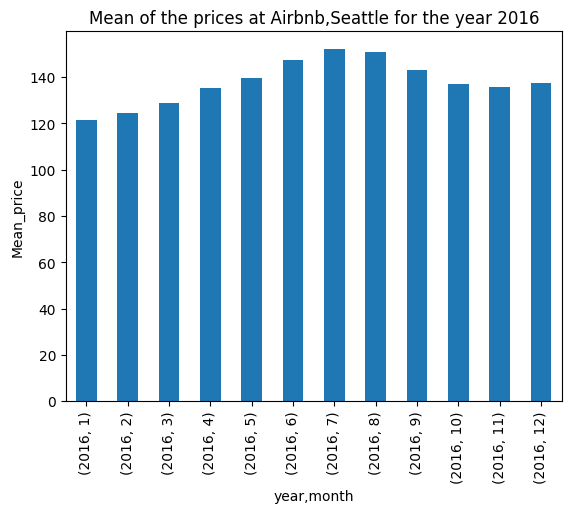

In [501]:
df_calendar.groupby(['year','month'])['price'].mean().plot(kind='bar')
plt.ylabel('Mean_price')
plt.title('Mean of the prices at Airbnb,Seattle for the year 2016');

#### Conclusion 1

From the above bar plot, we can conclude that **max occupancy** at Airbnb in Seattle is recorded in the months of **June to August** with peak at **July** and min occupancy at the start of the year from January to March.

#### Question 2:What are the price variations based on neighborhood ?

In [502]:
#Changing the datatype of price column to float by removing '$' sign
df_listings['price']=df_listings['price'].str.replace('\$|,','', regex=True).astype(float)


In [503]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [504]:
df_listings.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Southeast Magnolia    231.705882
Portage Bay           227.857143
Westlake              194.470588
West Queen Anne       187.769231
Montlake              182.789474
                         ...    
North Delridge         76.375000
Georgetown             76.125000
South Delridge         74.666667
Olympic Hills          71.687500
Rainier Beach          68.555556
Name: price, Length: 87, dtype: float64

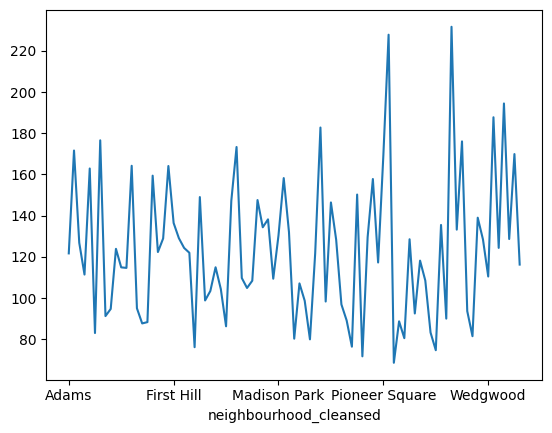

In [505]:
# Plotting the above data using line chart
df_listings.groupby(['neighbourhood_cleansed'])['price'].mean().plot();

The above chart doesn't give a clear picture so let's in particular extract the top 5 highest pricing neighborhoods and bottom 5 lowest pricing neighborhoods from total 87 neighborhoods.

In [506]:
# Top 5 highest pricing neighborhoods
df_neighborhoods=df_listings.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False)
df_top5_neighborhoods=df_neighborhoods.head(5)
df_top5_neighborhoods

neighbourhood_cleansed
Southeast Magnolia    231.705882
Portage Bay           227.857143
Westlake              194.470588
West Queen Anne       187.769231
Montlake              182.789474
Name: price, dtype: float64

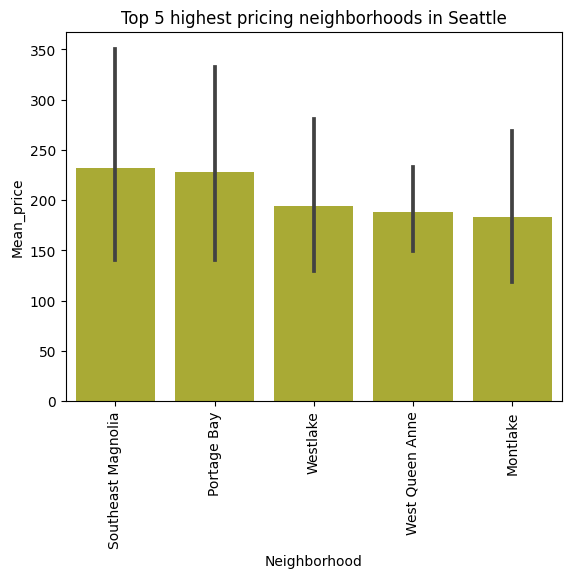

In [507]:
base_color=sns.color_palette()[8]
sns.barplot(data=df_listings,x='neighbourhood_cleansed',y='price',color=base_color,order=['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']);
plt.xlabel('Neighborhood')
plt.ylabel('Mean_price')
plt.title('Top 5 highest pricing neighborhoods in Seattle')
plt.xticks(rotation=90);

In [508]:
# Bottom 5 lowest pricing neighborhoods
df_bottom5_neighborhoods=df_neighborhoods.tail(5)
df_bottom5_neighborhoods

neighbourhood_cleansed
North Delridge    76.375000
Georgetown        76.125000
South Delridge    74.666667
Olympic Hills     71.687500
Rainier Beach     68.555556
Name: price, dtype: float64

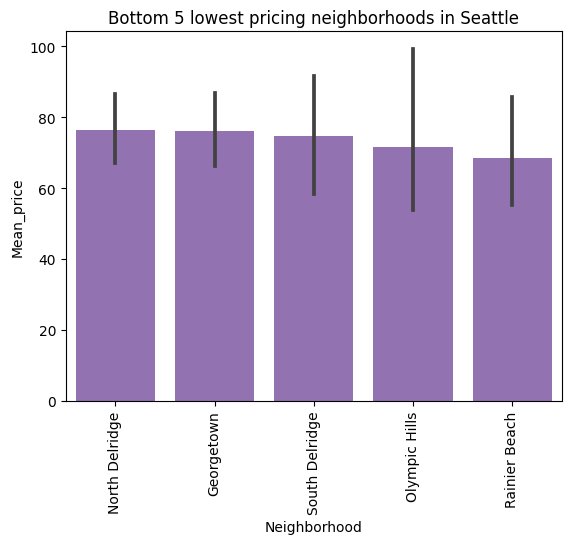

In [509]:
base_color=sns.color_palette()[4]
sns.barplot(data=df_listings,x='neighbourhood_cleansed',y='price',color=base_color,order=['North Delridge','Georgetown','South Delridge','Olympic Hills','Rainier Beach']);
plt.xlabel('Neighborhood')
plt.ylabel('Mean_price')
plt.title('Bottom 5 lowest pricing neighborhoods in Seattle')
plt.xticks(rotation=90);

#### Conclusion 2 a
From the above two graphs, we can conclude that **Southeast Magnolia** is the highest pricing neighborhood with mean price of $231.7 followed by **Portage Bay** with $227.85 and the least pricing neighborhood is **Rainier beach** with $68.5

To go a little more deeper as to which property type has the highest prices in top5 neighborhoods, let's carry out the analysis.

In [510]:
df_listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

From the above info, we can conclude that almost 90% of property types are House and Apartments, so let's plot a heatmap between these two property types and top5 neighborhoods to find out highest pricing property types in respective neighborhoods.

In [511]:
top5_neighborhoods = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
property_types = ('Apartment','House')
df_listings_1 = df_listings.loc[df_listings['neighbourhood_cleansed'].isin(top5_neighborhoods)]
df_listings_2 = df_listings_1.loc[df_listings['property_type'].isin(property_types)]

df_top5neighborhhods_property_price = df_listings_2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_top5neighborhhods_property_price


,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [512]:
df_price = df_top5neighborhhods_property_price['price'].values
df_price

array([133.33333333, 191.53333333, 113.83333333, 340.28571429,
       219.6       , 234.1       , 128.20833333, 247.39393939,
       142.4       , 168.        ])

In [513]:
df_price = np.reshape(df_price, (5,2))
df_price

array([[133.33333333, 191.53333333],
       [113.83333333, 340.28571429],
       [219.6       , 234.1       ],
       [128.20833333, 247.39393939],
       [142.4       , 168.        ]])

In [514]:
idx=['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols=['Apartment','House']
df=pd.DataFrame(df_price,index=idx,columns=cols)
df


,Apartment,House
Southeast Magnolia,133.333333,191.533333
Portage Bay,113.833333,340.285714
Westlake,219.600000,234.100000
West Queen Anne,128.208333,247.393939
Montlake,142.400000,168.000000


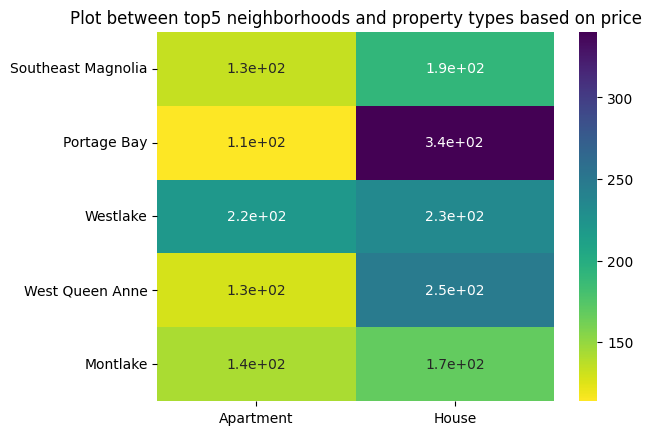

In [515]:
# Plot a heatmap
sns.heatmap(df,cmap='viridis_r',annot=True);
plt.title('Plot between top5 neighborhoods and property types based on price');

#### Conclusion 2 b
From the above heatmap, considering the two major property types i.e., House and Apartment, we can conclude that 
1. **House in Portage Bay** is the highest pricing neighborhood with $340 .
2. **Apartment in Portage Bay** is the lowest pricing neighborhood with $113.8 in the top5 neighborhoods.


#### Question 3:What is the vibe of each Seattle neighborhood using listing descriptions?

To find the vibe of Seattle neighborhoods i.e., analyse the positive and negative reviews we have to make use of the concept **'NLTK Sentiment Analyzer'**.

In [516]:
# Count of neighborhoods in Seattle
df_neighborhoods=df_listings['neighbourhood_cleansed'].nunique()
df_neighborhoods


87

In [517]:
# List of 87 neighborhoods
df_listings['neighbourhood_cleansed'].unique()


array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [518]:
# Let's extract the useful columns from reviews datatset 
df_reviews_copy=df_reviews[['listing_id','comments']].copy()
df_reviews_copy.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [519]:
# Define a function to get the neighborhood_cleansed when entering listing id
def get_neighborhood(listing_id):
    ''' A function to print the neighborhood_cleansed when entering the listing id
    INPUT-listing id
    OUTPUT-neighbourhood_cleansed'''
    neighbourhood = df_listings.loc[df_listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

In [520]:
# test the function
get_neighborhood(7202016)

'Lower Queen Anne'

In [521]:
df_listings[df_listings['id']==7202016].groupby(['neighbourhood_cleansed']).nunique()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
Lower Queen Anne,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Hence,verified.

In [522]:
# Apply get_neighborhood function to the entire df_reviews_copy dataset
df_reviews_copy['neighbourhood']=df_reviews_copy['listing_id'].apply(get_neighborhood)
df_reviews_copy.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [523]:
df_reviews_copy.to_csv('df_1.csv')

In [524]:
# Apply Sentiment Intensity Analyzer and find the sentiment scores
sent = SentimentIntensityAnalyzer()
df_sent = pd.read_csv('df_1.csv', usecols = ['comments','neighbourhood'])
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df_sent['comments']]
df_sent['sentiment_score'] = polarity
df_sent.head()

,comments,neighbourhood,sentiment_score
0,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.79
1,Kelly has a great room in a very central locat...,Lower Queen Anne,0.99
2,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.87
3,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.83
4,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.98


In [525]:
print('Positive compound scores:{} '.format(df_sent[df_sent['sentiment_score'] > 0].count()))

Positive compound scores:comments           82443
neighbourhood      82443
sentiment_score    82443
dtype: int64 


In [526]:
print('Negative compound scores:{} '.format(df_sent[df_sent['sentiment_score'] < 0].count()))

Negative compound scores:comments           846
neighbourhood      846
sentiment_score    846
dtype: int64 


In [527]:
print('Neutral compound scores:{} '.format(df_sent[df_sent['sentiment_score'] == 0].count()))

Neutral compound scores:comments           1542
neighbourhood      1542
sentiment_score    1542
dtype: int64 


In [528]:
# Visualize top 10 neighborhoods based on sentiment scores
df_neighborhoods_top10=df_sent.groupby(['neighbourhood'])['sentiment_score'].mean().sort_values(ascending=False)



In [529]:
df_neighborhoods_top10

neighbourhood
Roxhill                0.947143
Cedar Park             0.939890
Pinehurst              0.939000
Arbor Heights          0.937609
Windermere             0.934270
                         ...   
Industrial District    0.843014
Mid-Beacon Hill        0.840726
University District    0.811338
Holly Park             0.802373
View Ridge             0.794286
Name: sentiment_score, Length: 87, dtype: float64

In [530]:
df_neighborhoods_top10.head(10)

neighbourhood
Roxhill             0.947143
Cedar Park          0.939890
Pinehurst           0.939000
Arbor Heights       0.937609
Windermere          0.934270
Meadowbrook         0.919864
Whittier Heights    0.918708
Sunset Hill         0.916263
Fauntleroy          0.913837
Riverview           0.912828
Name: sentiment_score, dtype: float64

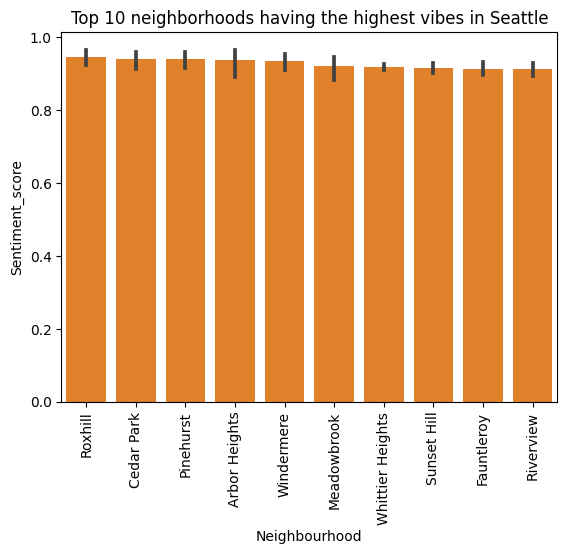

In [531]:
base_color=sns.color_palette()[1]
sns.barplot(data=df_sent,x='neighbourhood',y='sentiment_score',color=base_color,order=['Roxhill','Cedar Park','Pinehurst','Arbor Heights','Windermere','Meadowbrook','Whittier Heights','Sunset Hill','Fauntleroy','Riverview' ]);
plt.xlabel('Neighbourhood')
plt.ylabel('Sentiment_score')
plt.title('Top 10 neighborhoods having the highest vibes in Seattle')
plt.xticks(rotation=90);

In [532]:
# Visualize bottom 10 neighborhoods based on sentiment scores
df_neighborhoods_bottom10=df_sent.groupby(['neighbourhood'])['sentiment_score'].min().sort_values(ascending=False)

In [533]:
df_neighborhoods_bottom10.tail(10)

neighbourhood
Montlake                    -0.99
Mount Baker                 -0.99
First Hill                  -0.99
Lawton Park                 -0.99
Central Business District   -0.99
Ravenna                     -0.99
Seaview                     -0.99
Broadway                    -1.00
Minor                       -1.00
University District         -1.00
Name: sentiment_score, dtype: float64

Text(0.5, 1.0, 'Bottom 10 neighborhoods having the lowest vibes in Seattle')

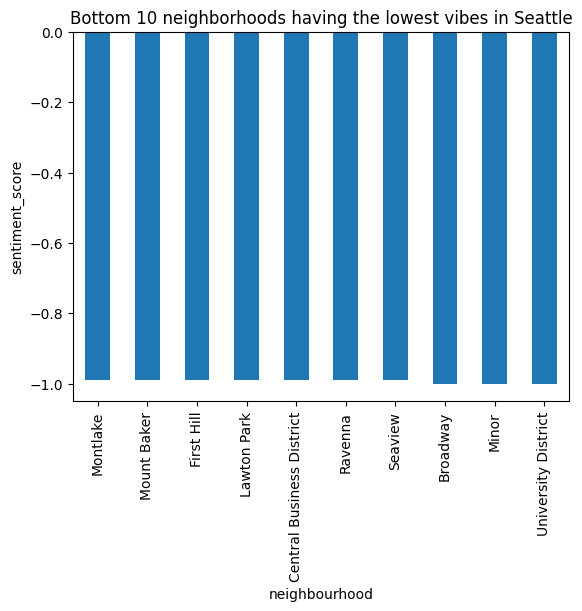

In [534]:
df_neighborhoods_bottom10.tail(10).plot(kind='bar');
plt.ylabel('sentiment_score')
plt.title('Bottom 10 neighborhoods having the lowest vibes in Seattle')

#### Conclusion 3
1. **Roxhill** is the neighbourhood having the highest positive reviews followed by Cedar Park and Pinehurst.
2. **Broadway,Minor and University District** have the most negative reviews.


#### Question 4:What are the numerical variables which have high correlation to price?

In [535]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [536]:
df_listings['price'].isnull().sum()

0

In [537]:
df_listings.shape

(3818, 91)

Therefore, no missing values in price column.

In [538]:
# Let's drop the columns which are likely to have very less impact on price
df_list_high_impact=df_listings.copy()
cols_less_impact=['listing_url','scrape_id','last_scraped','host_id','latitude','longitude','thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url','host_url','host_is_superhost','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'weekly_price', 'monthly_price','calendar_updated','jurisdiction_names',
       'require_guest_profile_picture', 'require_guest_phone_verification','experiences_offered','is_location_exact',
       'calculated_host_listings_count', 'reviews_per_month','first_review', 'last_review','calendar_last_scraped']
df_list_high_impact = df_list_high_impact.drop(cols_less_impact, axis=1)

In [539]:
df_list_high_impact.shape

(3818, 50)

Now let's clean our data by filling in missing values.

In [540]:
# Let's clean the categorical data

cat_columns=df_list_high_impact.select_dtypes(include=['object']).columns
for col in cat_columns:
    print(col,df_list_high_impact[col].isnull().sum())

name 0
summary 177
space 569
description 0
neighborhood_overview 1032
notes 1606
transit 934
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
neighbourhood_cleansed 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
instant_bookable 0
cancellation_policy 0


In [541]:
# Since summary,space,neighborhood_overview,notes,transit,host_name,host_since, host_location, host_about are descriptive in nature, let's convert them into boolean fields 0 and 1.
def bool_text(text):
    '''
    Function to convert all text fields to boolean
    INPUT:
    text - data that needs to be converted into a boolean value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text is present, 1 otherwise to indicate presence of the text .
    '''
    if not text:
        return 0
    else:
        return 1
text=['name','summary','space','description','neighborhood_overview','notes','transit','host_name','host_since', 'host_location', 'host_about']
for t in text:
    df_list_high_impact[t]=df_list_high_impact[t].apply(bool_text)



In [542]:
 #Function to set all t/f fields to 1/0
def bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true

    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_columns = ['has_availability','requires_license','instant_bookable']
for t in tf_columns:
    df_list_high_impact[t] = df_list_high_impact[t].apply(bool_tf)

In [543]:
# Assign N/A to applicable host fields
df_list_high_impact['host_response_time'] = df_list_high_impact['host_response_time'].fillna('N/A')
df_list_high_impact['host_acceptance_rate'] = df_list_high_impact['host_acceptance_rate'].fillna('N/A')

df_list_high_impact['host_response_rate'] = df_list_high_impact['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_list_high_impact['host_response_rate'] = df_list_high_impact['host_response_rate'].replace('\%|,','',regex=True)
df_list_high_impact['host_response_rate'] = df_list_high_impact['host_response_rate'].astype(float)
df_list_high_impact['host_response_rate'] = df_list_high_impact['host_response_rate'].fillna(0)


# Drop record with empty value for property_type
df_list_high_impact = df_list_high_impact.dropna(subset=['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people

df_list_high_impact['security_deposit'] = df_list_high_impact['security_deposit'].fillna(0)
df_list_high_impact['cleaning_fee'] = df_list_high_impact['cleaning_fee'].fillna(0)



In [544]:
df_list_high_impact.shape

(3817, 50)

In [545]:
# Check for missing values 
cat_columns = df_list_high_impact.select_dtypes(include=['object']).columns
for col in cat_columns:
        print(col,df_list_high_impact[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
property_type 0
room_type 0
bed_type 0
amenities 0
security_deposit 0
cleaning_fee 0
extra_people 0
cancellation_policy 0


In [546]:
# This is the list of most preferred amenities. You can add further in the list.

most_preferred = ["TV", "Cable TV", "Internet", "Wireless Internet", "Air Conditioning", "Kitchen", "Heating", "Family/Kid Friendly", "Washer", "Dryer", "Free Parking on Premises", "Buzzer/Wireless Intercom", "Essentials", "Dog(s)", "Cat(s)", "Breakfast", "Laptop Friendly Workspace", "Indoor Fireplace", "Hot Tub", "Pets live on this property"]


In [547]:
df_amenities = df_list_high_impact['amenities'].copy()

In [548]:
df_amenities = df_amenities.str.replace('"', "", regex=False)
df_amenities = df_amenities.str.replace('{', "", regex=False)
df_amenities = df_amenities.str.replace('}', "", regex=False)
df_amenities = df_amenities.str.split(',')

In [549]:
df_amenities.head()

0    [TV, Cable TV, Internet, Wireless Internet, Ai...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
2    [TV, Cable TV, Internet, Wireless Internet, Ai...
3    [Internet, Wireless Internet, Kitchen, Indoor ...
4    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, dtype: object

In [550]:
df_clean_amenities = pd.DataFrame(columns=most_preferred)
for index in range(df_amenities.shape[0]):
    temp = []
    for col in most_preferred:
        if col in df_amenities.iloc[index]:
            temp.append(1)
        else:
            temp.append(0)
    df_clean_amenities.loc[index] = temp

In [551]:
df_clean_amenities

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,Free Parking on Premises,Buzzer/Wireless Intercom,Essentials,Dog(s),Cat(s),Breakfast,Laptop Friendly Workspace,Indoor Fireplace,Hot Tub,Pets live on this property
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1
3,0,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0
4,1,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0
3813,1,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0
3814,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1
3815,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [552]:



#Removing the source column
df_list_high_impact.drop('amenities', axis=1, inplace=True)

# Adding the amenities dataframe to the listings_new dataframe
df_list_high_impact = pd.concat([df_list_high_impact,df_clean_amenities], axis=1)



In [553]:
df_list_high_impact.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_name,host_since,...,Free Parking on Premises,Buzzer/Wireless Intercom,Essentials,Dog(s),Cat(s),Breakfast,Laptop Friendly Workspace,Indoor Fireplace,Hot Tub,Pets live on this property
0,241032.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,953595.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3308979.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,7421966.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,278830.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [554]:
# Let's clean the numerical data
num_columns = df_list_high_impact.select_dtypes(include=['int','float']).columns
for col in num_columns:
        print(col,df_list_high_impact[col].isnull().sum())

id 1
name 1
summary 1
space 1
description 1
neighborhood_overview 1
notes 1
transit 1
host_name 1
host_since 1
host_location 1
host_about 1
host_response_rate 1
host_listings_count 3
host_total_listings_count 3
accommodates 1
bathrooms 17
bedrooms 7
beds 2
square_feet 3721
price 1
guests_included 1
minimum_nights 1
maximum_nights 1
has_availability 1
availability_30 1
availability_60 1
availability_90 1
availability_365 1
number_of_reviews 1
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656
requires_license 1
instant_bookable 1
TV 1
Cable TV 1
Internet 1
Wireless Internet 1
Air Conditioning 1
Kitchen 1
Heating 1
Family/Kid Friendly 1
Washer 1
Dryer 1
Free Parking on Premises 1
Buzzer/Wireless Intercom 1
Essentials 1
Dog(s) 1
Cat(s) 1
Breakfast 1
Laptop Friendly Workspace 1
Indoor Fireplace 1
Hot Tub 1
Pets live on this property 1


In [555]:
# Drop square_feet column since 3720 values are missing out of 3818 values
df_list_high_impact = df_list_high_impact.drop(['square_feet'],axis=1)

In [556]:
#Since there are only 2 missing values for host_listing_count and host_total_listings_count let's drop the values.
df_list_high_impact = df_list_high_impact.dropna(subset=['host_listings_count'])
df_list_high_impact = df_list_high_impact.dropna(subset=['host_total_listings_count'])

In [557]:
# Set 0 for bathroom where bathroom is Nan
df_list_high_impact['bathrooms'] = df_list_high_impact['bathrooms'].fillna(0)

# Set 0 for bedrooms where bedrooms is Nan
df_list_high_impact['bedrooms'] = df_list_high_impact['bedrooms'].fillna(0)

# Set 0 for beds where beds is Nan
df_list_high_impact['beds'] = df_list_high_impact['beds'].fillna(0)


# Set all columns with 0 for Nan values
null_columns = ['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning','Kitchen', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Free Parking on Premises', 'Buzzer/Wireless Intercom', 'Essentials', 'Dog(s)', 'Cat(s)','Breakfast', 'Laptop Friendly Workspace', 'Indoor Fireplace', 'Hot Tub', 'Pets live on this property','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

for col in null_columns:
    df_list_high_impact[col] = df_list_high_impact[col].fillna(0)

In [558]:
# Check for missing values 
num_columns = df_list_high_impact.select_dtypes(include=['int','float']).columns
for col in num_columns:
        print(col,df_list_high_impact[col].isnull().sum())

id 0
name 0
summary 0
space 0
description 0
neighborhood_overview 0
notes 0
transit 0
host_name 0
host_since 0
host_location 0
host_about 0
host_response_rate 0
host_listings_count 0
host_total_listings_count 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
has_availability 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0
requires_license 0
instant_bookable 0
TV 0
Cable TV 0
Internet 0
Wireless Internet 0
Air Conditioning 0
Kitchen 0
Heating 0
Family/Kid Friendly 0
Washer 0
Dryer 0
Free Parking on Premises 0
Buzzer/Wireless Intercom 0
Essentials 0
Dog(s) 0
Cat(s) 0
Breakfast 0
Laptop Friendly Workspace 0
Indoor Fireplace 0
Hot Tub 0
Pets live on this property 0


In [559]:
df_list_high_impact.shape

(3815, 68)

In [560]:
df_list_high_impact_num=df_list_high_impact.select_dtypes(include=['int','float']).copy()

In [561]:
df_list_high_impact_num.shape

(3815, 58)

In [562]:
df_list_high_impact_num.isnull().sum()

id                             0
name                           0
summary                        0
space                          0
description                    0
neighborhood_overview          0
notes                          0
transit                        0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_rate             0
host_listings_count            0
host_total_listings_count      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
guests_included                0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_sco

## 4) Data Modelling

In [563]:
# List the X and y columns
X = df_list_high_impact_num.drop(['price'], axis=1)
y = df_list_high_impact_num['price']


In [570]:
# Create train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2670, 57) (2670,)
(1145, 57) (1145,)


In [571]:
# Instantiate the model
lm_model=LinearRegression()

In [572]:
#Fit and predict the model
lm_model.fit(X_train,y_train)
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score,test_score))



The rsquared score on the training data was 0.5213024052980926.  The rsquared score on the test data was 0.512281652517685.


## 5) Data Evaluation

In [576]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient estimate and abs(estimate)
    
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#Quick look at top results
coef_df.head(10)

,est_int,coefs,abs_coefs
16,bathrooms,26.232495,26.232495
17,bedrooms,24.443734,24.443734
48,Buzzer/Wireless Intercom,17.489005,17.489005
55,Hot Tub,15.838931,15.838931
15,accommodates,15.434493,15.434493
41,Air Conditioning,15.195588,15.195588
56,Pets live on this property,-14.442436,14.442436
47,Free Parking on Premises,-9.988123,9.988123
45,Washer,-9.279528,9.279528
52,Breakfast,-8.976874,8.976874


#### Conclusion 4
After modelling the data, I was able to get an r2score of 0.52 on  training and 0.51 on test data sets.
Based on the above coefficient analysis, the features that have the most impact on price are bathrooms,bedrooms and some of the amenities like Wireless Intercom,HotTub,Air Conditioning etc.